In [11]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [2]:
df_alert_date = pd.read_csv("./訓練資料集_first/train_x_alert_date.csv")
df_custinfo = pd.read_csv("./訓練資料集_first/public_train_x_custinfo_full_hashed.csv")
df_dp = pd.read_csv("./訓練資料集_first/public_train_x_dp_full_hashed.csv")
df_answer = pd.read_csv("./訓練資料集_first/train_y_answer.csv")
data = df_alert_date.merge(df_custinfo, how= 'left', on = 'alert_key')
data = data.merge(df_dp['cust_id'].value_counts(), how = 'left', left_on='cust_id', right_index=True)
data = data.merge(df_answer, how= 'left', on = 'alert_key')
data

,alert_key,date,cust_id_x,risk_rank,occupation_code,total_asset,AGE,cust_id_y,sar_flag
0,171189,0,972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...,1,17.0,375576.0,4,284.0,0
1,171202,0,a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...,3,12.0,2717416.0,2,217.0,0
2,171599,0,3433ecc068ed1c9e2f5037cab5d42d7b901e9bd624c1fb...,1,12.0,326517.0,4,205.0,0
3,171737,0,a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...,3,14.0,1014759.0,4,504.0,0
4,171142,0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,25183.0,0
...,...,...,...,...,...,...,...,...,...
23901,352132,364,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3,157.0,0
23902,352125,364,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,20.0,0
23903,352080,364,1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...,2,9.0,69080.0,6,71.0,0
23904,352075,364,9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...,3,3.0,262604.0,6,474.0,0


In [7]:
training_data = data[['risk_rank', 'occupation_code', 'total_asset', 'AGE', 'cust_id_y']].fillna(0)
label_data = data['sar_flag'].fillna(-1)
X_train, X_test, y_train, y_test = train_test_split(training_data, label_data, test_size=0.3, random_state=1)

0.49400950510828423


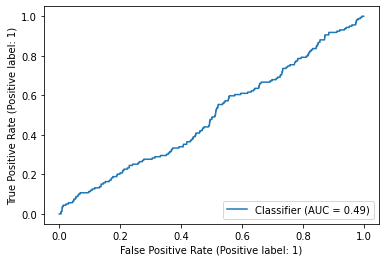

In [13]:
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train)
print(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
RocCurveDisplay.from_predictions(y_train, clf.predict_proba(X_train)[:, 1])
plt.show()

0.49831947771358787


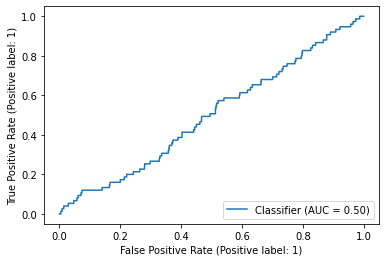

In [14]:
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
RocCurveDisplay.from_predictions(y_test, clf.predict_proba(X_test)[:, 1])
plt.show()